We got the data set from VAERS dataset[https://vaers.hhs.gov/data/datasets.html]. There are originally 51 varibales. Oue target variable in this project is DIED.

|Variable Name|Variable Description|
|-------------|--------------------|
|DIED| Death count |
|STATE|State of sample|
|L_THREAT| Life-threatening illness|
|AGE_YRS|Vaccine recipient's age in years)|
|SEX |Sex of the vaccine recipient|
|RECOVD|Whether people suffer from side effect recovered|
|VAX_MANU|Vaccine manufacturer|
|VAX_ROUTE|Vaccination route|
|VAX_DOSE_SERIES|Number of doses administered|
|VAX_SITE|Vaccination site|
|VAX_NAME| Vaccination name|

# 1 Load data

In [1]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import pandas as pd
import numpy as np
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [2]:
# read in data
vaers_vax=pd.read_csv ('2021VAERSVAX.csv', encoding='latin1')
vaers_sym=pd.read_csv ('2021VAERSSYMPTOMS.csv')
vaers_data=pd.read_csv ('2021VAERSDATA.csv',encoding='latin1')

C:\Users\26482\AppData\Local\Temp\ipykernel_20652\2515902421.py:4: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  vaers_data=pd.read_csv ('2021VAERSDATA.csv',encoding='latin1')


# 2 Preprocess

## 2.1 Description
There are three seperate data csv that we need to extract columns among them and combine together, variable 'VAERS_ID' is identify name for each individual sample and it correspondes with rows of other variables listing. Each csv has the correponding position for 'VAERS_ID'.During this step we extract 15 variables to prepare for the next step of data processing.

In [3]:
vaers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736017 entries, 0 to 736016
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      736017 non-null  int64  
 1   RECVDATE      736017 non-null  object 
 2   STATE         639822 non-null  object 
 3   AGE_YRS       654211 non-null  float64
 4   CAGE_YR       585103 non-null  float64
 5   CAGE_MO       4142 non-null    float64
 6   SEX           736017 non-null  object 
 7   RPT_DATE      687 non-null     object 
 8   SYMPTOM_TEXT  735722 non-null  object 
 9   DIED          10079 non-null   object 
 10  DATEDIED      8827 non-null    object 
 11  L_THREAT      11110 non-null   object 
 12  ER_VISIT      120 non-null     object 
 13  HOSPITAL      47200 non-null   object 
 14  HOSPDAYS      31305 non-null   float64
 15  X_STAY        379 non-null     object 
 16  DISABLE       11970 non-null   object 
 17  RECOVD        663793 non-null  object 
 18  VAX_

In [4]:
vaers_vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779647 entries, 0 to 779646
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   VAERS_ID         779647 non-null  int64 
 1   VAX_TYPE         779647 non-null  object
 2   VAX_MANU         779647 non-null  object
 3   VAX_LOT          537603 non-null  object
 4   VAX_DOSE_SERIES  775461 non-null  object
 5   VAX_ROUTE        587783 non-null  object
 6   VAX_SITE         558687 non-null  object
 7   VAX_NAME         779647 non-null  object
dtypes: int64(1), object(7)
memory usage: 47.6+ MB


In [5]:
vaers_sym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982037 entries, 0 to 982036
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         982037 non-null  int64  
 1   SYMPTOM1         982037 non-null  object 
 2   SYMPTOMVERSION1  982037 non-null  float64
 3   SYMPTOM2         760644 non-null  object 
 4   SYMPTOMVERSION2  760644 non-null  float64
 5   SYMPTOM3         581505 non-null  object 
 6   SYMPTOMVERSION3  581505 non-null  float64
 7   SYMPTOM4         441808 non-null  object 
 8   SYMPTOMVERSION4  441808 non-null  float64
 9   SYMPTOM5         330585 non-null  object 
 10  SYMPTOMVERSION5  330585 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 82.4+ MB


In [6]:
vaers_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [7]:
print(vaers_data.shape)

(736017, 35)


In [8]:
vaers_vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,910642,COVID19,PFIZER\BIONTECH,EJ1685,1,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
1,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
2,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
3,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))


In [9]:
print(vaers_vax.shape)

(779647, 8)


In [10]:
vaers_sym.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,910642,Dyspnoea,25.0,Heart rate increased,25.0,SARS-CoV-2 test negative,25.0,NaN,NaN,NaN,NaN
1,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
3,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
4,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN


In [11]:
print(vaers_sym.shape)

(982037, 11)


## 2.2 Data processing
After combine variables from different csv, we examing the missing value and outliers of the new dataset. Finally we delete missing cases and unmeaningful cases, and transer the meaningful null value cases including 'DIED', L_THREAT'from null value to indicating 'people still alive'.

In [12]:
# emerge dataset
data_vax=pd.merge(vaers_data, vaers_vax, how='outer', on=['VAERS_ID'])
data_vax.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,Y,NaN,Pcn and bee venom,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Y,NaN,"""Dairy""",COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,NaN,Y,Shellfish,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom...",COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,NaN,NaN,Na,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [13]:
print(data_vax.shape)

(779647, 42)


In [14]:
data_vax_sym=pd.merge(data_vax, vaers_sym, how='outer', on=['VAERS_ID'])
data_vax_sym.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


In [15]:
print(data_vax_sym.shape)

(1047617, 52)


In [16]:
# keep the data related to covid-19
data_vax_sym_c=data_vax_sym.drop(data_vax_sym[(data_vax_sym.VAX_TYPE!='COVID19')].index)

In [17]:
# select the features we need
df=data_vax_sym_c[['VAERS_ID','STATE','AGE_YRS','SEX','DIED','L_THREAT','RECOVD',
                 'VAX_MANU','VAX_DOSE_SERIES','VAX_ROUTE','VAX_SITE','VAX_NAME',
                 'SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]

In [18]:
df.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,L_THREAT,RECOVD,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916600,TX,33.0,F,NaN,NaN,Y,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN
1,916601,CA,73.0,F,NaN,NaN,Y,MODERNA,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN
2,916602,WA,23.0,F,NaN,NaN,U,PFIZER\BIONTECH,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN
3,916603,WA,58.0,F,NaN,NaN,Y,MODERNA,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),Dizziness,Fatigue,Mobility decreased,NaN,NaN
4,916604,TX,47.0,F,NaN,NaN,N,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN


In [19]:
# examine duplicated rows in the data set
df.duplicated().sum() 

5107

In [20]:
df.drop_duplicates()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,L_THREAT,RECOVD,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916600,TX,33.0,F,NaN,NaN,Y,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN
1,916601,CA,73.0,F,NaN,NaN,Y,MODERNA,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN
2,916602,WA,23.0,F,NaN,NaN,U,PFIZER\BIONTECH,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN
3,916603,WA,58.0,F,NaN,NaN,Y,MODERNA,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),Dizziness,Fatigue,Mobility decreased,NaN,NaN
4,916604,TX,47.0,F,NaN,NaN,N,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047611,1998663,TN,83.0,F,Y,NaN,N,JANSSEN,UNK,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Cerebellar infarction,Cerebrovascular accident,Computerised tomogram head normal,Dysarthria,Dysphagia
1047612,1998663,TN,83.0,F,Y,NaN,N,JANSSEN,UNK,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Dyspnoea,Echocardiogram normal,Ejection fraction normal,Facial paralysis,Feeling abnormal
1047613,1998663,TN,83.0,F,Y,NaN,N,JANSSEN,UNK,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Gastrointestinal haemorrhage,Gastrostomy,Hyperlipidaemia,Hypertension,Laboratory test
1047614,1998663,TN,83.0,F,Y,NaN,N,JANSSEN,UNK,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Magnetic resonance imaging head abnormal,Oesophagogastroduodenoscopy,Peripheral swelling,Type 2 diabetes mellitus,Ultrasound Doppler normal


Text(0.5, 1.0, 'Missing values in dataframe')

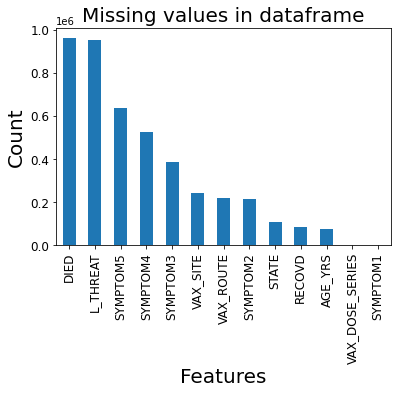

In [21]:
# examine missing values
missingTotal = df.isnull().sum().sort_values(ascending=False)
missingTotal=missingTotal[missingTotal>0]
missingTotal.plot(kind="bar",fontsize=12)
plt.xlabel("Features",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Missing values in dataframe",fontsize=20)

# we have 13 features with black 
# DIED: If the vaccine recipient died a “Y” is used; otherwise, the field will be blank.
# L_THREAT: If the vaccine recipient had a life-threatening event associated with the vaccination a “Y” is placed is used; otherwise, the field will be blank.
# Recovered (RECOVD): A “Y” is placed in the field if the vaccine recipient recovered from the adverse event. “N” indicates that the vaccinee has not recovered from the adverse event. “U” or blank indicates that the vaccine recipient’s recovery status is unknown.
# SYMPTOM1-5: It there is no SYMPTOM, the field will be blank.


In [22]:
df.shape

(980915, 17)

In [23]:
# Only the black value of VAX_ROUTE, VAX_SITE, STATE, AGE_YRS, RECOVD and VAX_DOSE_SERIES need to be drop
# Drop missing cases
df2=df.dropna(subset=['VAX_ROUTE','VAX_SITE','STATE','AGE_YRS','RECOVD','VAX_DOSE_SERIES'])
df2.shape

(568243, 17)

In [24]:
# Drop missing cases in sex(U means missing value)
df2=df2.drop(df2[(df2.SEX=='U')].index)
df2.shape

(566681, 17)

In [25]:
# Drop missing cases in Recovd
df2=df2.drop(df2[(df2.RECOVD=='U')].index)
df2.shape

(464521, 17)

In [26]:
# Drop missing cases in Manufacture
df2=df2.drop(df2[(df2.VAX_MANU=='UNKNOWN MANUFACTURER')].index)
df2.shape

(463888, 17)

In [27]:
# Drop missing cases in Dose series
df2=df2.drop(df2[(df2.VAX_DOSE_SERIES=='UNK')].index)
df2.shape

(437850, 17)

In [28]:
# Drop missing cases in route
df2=df2.drop(df2[(df2.VAX_ROUTE=='UN')].index)
df2.shape

(433893, 17)

In [29]:
# Drop missing cases in site
df2 = df2.drop(df2[(df2.VAX_SITE=='UN')].index)
df2.shape

(425329, 17)

In [30]:
# Drop missing cases in vax name
df2 = df2.drop(df2[(df2.VAX_NAME=='COVID19 (COVID19 (UNKNOWN))')].index)
df2.shape

(425329, 17)

<AxesSubplot:xlabel='AGE_YRS'>

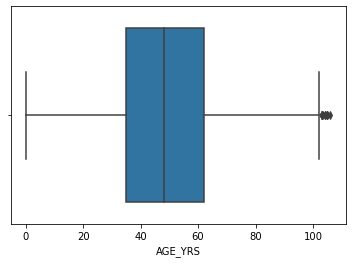

In [31]:
# Outlier
# examone age variable 
sns.boxplot(x=df2['AGE_YRS']) 
# No processing required

# 3 Feature Engneering
Since there are many categorical variables that we need to use in this dataset, we need to do feature transformation to this type of variables.

In [32]:
df2.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,L_THREAT,RECOVD,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916600,TX,33.0,F,NaN,NaN,Y,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN
1,916601,CA,73.0,F,NaN,NaN,Y,MODERNA,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN
4,916604,TX,47.0,F,NaN,NaN,N,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN
7,916606,NV,44.0,F,NaN,NaN,Y,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Pharyngeal swelling,NaN,NaN,NaN,NaN
10,916609,TN,71.0,F,NaN,NaN,N,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Vaccination site erythema,Vaccination site pruritus,Vaccination site swelling,NaN,NaN


In [33]:
# Feature ecoding
df2_D = pd.get_dummies(data=df2, columns=['DIED'])
df2_D

,VAERS_ID,STATE,AGE_YRS,SEX,L_THREAT,RECOVD,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,DIED_Y
0,916600,TX,33.0,F,NaN,Y,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN,0
1,916601,CA,73.0,F,NaN,Y,MODERNA,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN,0
4,916604,TX,47.0,F,NaN,N,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,0
7,916606,NV,44.0,F,NaN,Y,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Pharyngeal swelling,NaN,NaN,NaN,NaN,0
10,916609,TN,71.0,F,NaN,N,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Vaccination site erythema,Vaccination site pruritus,Vaccination site swelling,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047599,1996867,PA,83.0,F,Y,N,MODERNA,2,SYR,RA,COVID19 (COVID19 (MODERNA)),X-ray of pelvis and hip normal,NaN,NaN,NaN,NaN,1
1047600,1996868,IN,16.0,M,NaN,Y,PFIZER\BIONTECH,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Axillary pain,Fatigue,Pain,Pain in extremity,NaN,0
1047605,1997119,SC,27.0,F,NaN,N,MODERNA,3,IM,LA,COVID19 (COVID19 (MODERNA)),Dermatitis,Erythema,Mechanical urticaria,Pruritus,Urticaria,0
1047606,1997120,ID,56.0,M,NaN,Y,PFIZER\BIONTECH,3,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood urine present,Condition aggravated,Kidney infection,Laboratory test,Pyrexia,0


In [34]:
df2_D = pd.get_dummies(data=df2_D, columns=['L_THREAT'])
df2_D

,VAERS_ID,STATE,AGE_YRS,SEX,RECOVD,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,DIED_Y,L_THREAT_Y
0,916600,TX,33.0,F,Y,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN,0,0
1,916601,CA,73.0,F,Y,MODERNA,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN,0,0
4,916604,TX,47.0,F,N,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,0,0
7,916606,NV,44.0,F,Y,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Pharyngeal swelling,NaN,NaN,NaN,NaN,0,0
10,916609,TN,71.0,F,N,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Vaccination site erythema,Vaccination site pruritus,Vaccination site swelling,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047599,1996867,PA,83.0,F,N,MODERNA,2,SYR,RA,COVID19 (COVID19 (MODERNA)),X-ray of pelvis and hip normal,NaN,NaN,NaN,NaN,1,1
1047600,1996868,IN,16.0,M,Y,PFIZER\BIONTECH,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Axillary pain,Fatigue,Pain,Pain in extremity,NaN,0,0
1047605,1997119,SC,27.0,F,N,MODERNA,3,IM,LA,COVID19 (COVID19 (MODERNA)),Dermatitis,Erythema,Mechanical urticaria,Pruritus,Urticaria,0,0
1047606,1997120,ID,56.0,M,Y,PFIZER\BIONTECH,3,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood urine present,Condition aggravated,Kidney infection,Laboratory test,Pyrexia,0,0


In [35]:
df2_D_object = df2_D.select_dtypes(include='object').columns
print(df2_D_object)

Index(['STATE', 'SEX', 'RECOVD', 'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_ROUTE',
       'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4',
       'SYMPTOM5'],
      dtype='object')


In [36]:
print(df2_D_object[0:8])

Index(['STATE', 'SEX', 'RECOVD', 'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_ROUTE',
       'VAX_SITE', 'VAX_NAME'],
      dtype='object')


In [37]:
df_Dummy = pd.get_dummies(data=df2_D, columns=df2_D_object[0:8],drop_first=True)
df_Dummy

,VAERS_ID,AGE_YRS,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,DIED_Y,L_THREAT_Y,STATE_AL,...,VAX_SITE_LA,VAX_SITE_LG,VAX_SITE_LL,VAX_SITE_MO,VAX_SITE_NS,VAX_SITE_OT,VAX_SITE_RA,VAX_SITE_RL,VAX_NAME_COVID19 (COVID19 (MODERNA)),VAX_NAME_COVID19 (COVID19 (PFIZER-BIONTECH))
0,916600,33.0,Dysphagia,Epiglottitis,NaN,NaN,NaN,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,916601,73.0,Anxiety,Dyspnoea,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,916604,47.0,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7,916606,44.0,Pharyngeal swelling,NaN,NaN,NaN,NaN,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10,916609,71.0,Vaccination site erythema,Vaccination site pruritus,Vaccination site swelling,NaN,NaN,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047599,1996867,83.0,X-ray of pelvis and hip normal,NaN,NaN,NaN,NaN,1,1,0,...,0,0,0,0,0,0,1,0,1,0
1047600,1996868,16.0,Axillary pain,Fatigue,Pain,Pain in extremity,NaN,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1047605,1997119,27.0,Dermatitis,Erythema,Mechanical urticaria,Pruritus,Urticaria,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1047606,1997120,56.0,Blood urine present,Condition aggravated,Kidney infection,Laboratory test,Pyrexia,0,0,0,...,0,0,0,0,0,0,1,0,0,1


# 4 EDA
Our output feature is 'DIED, 6 input features are AGE_YRS, SEX, L_THREAT, RECOVD,VAX_MANU, VAX_DOSE_SERIES.After data exploration analysis, we found out two interestnig findings:
1) People who get vaccine from MODERNA have less death ratio than people who get vaccine from PFIZER.
2) The younger people get vaccine, the higher ratio of recovery from side effect after vaccination. 
Since most features we use are vategorical variables, we use gini coefficient method to draw the correlation heat map showing the relationship between features.

In [38]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

# read in data
#vaers_vax=pd.read_csv ('2021VAERSVAX.csv')
#vaers_sym=pd.read_csv ('2021VAERSSYMPTOMS.csv')
#vaers_data=pd.read_csv ('2021VAERSDATA.csv')

In [39]:
# emerge dataset
data_vax=pd.merge(vaers_data, vaers_vax, how='outer', on=['VAERS_ID'])
data_vax_sym=pd.merge(data_vax, vaers_sym, how='outer', on=['VAERS_ID'])


# select some feature
df=data_vax_sym[['VAERS_ID','STATE','AGE_YRS','SEX','DIED','L_THREAT','RECOVD',
                 'VAX_MANU','VAX_DOSE_SERIES','VAX_ROUTE','VAX_SITE','VAX_NAME',]]

df.shape

(1047617, 12)

In [40]:
df['DIED'] = df['DIED'].fillna('N')
df['L_THREAT'] = df['L_THREAT'].fillna('N')
df = df[df['SEX'] != 'U']
df = df[df['RECOVD'] != 'U']
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.isnull().sum()

VAERS_ID           0
STATE              0
AGE_YRS            0
SEX                0
DIED               0
L_THREAT           0
RECOVD             0
VAX_MANU           0
VAX_DOSE_SERIES    0
VAX_ROUTE          0
VAX_SITE           0
VAX_NAME           0
dtype: int64

In [41]:
df.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,L_THREAT,RECOVD,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,TX,33.0,F,N,N,Y,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,CA,73.0,F,N,N,Y,MODERNA,1,IM,RA,COVID19 (COVID19 (MODERNA))
4,916604,TX,47.0,F,N,N,N,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA))
5,916605,TX,40.0,M,N,N,N,"SEQIRUS, INC.",1,SYR,LA,INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT)
7,916606,NV,44.0,F,N,N,Y,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [42]:
df['SEX'].value_counts()

F    238317
M     97120
Name: SEX, dtype: int64

In [43]:
df['L_THREAT'].value_counts()

N    328931
Y      6506
Name: L_THREAT, dtype: int64

In [44]:
df['RECOVD'].value_counts()

N    167800
Y    167637
Name: RECOVD, dtype: int64

In [45]:
df['DIED'].value_counts()

N    330229
Y      5208
Name: DIED, dtype: int64

In [46]:
df['VAX_MANU'].value_counts()

MODERNA                              159109
PFIZER\BIONTECH                      134505
JANSSEN                               25838
GLAXOSMITHKLINE BIOLOGICALS            5614
MERCK & CO. INC.                       2759
UNKNOWN MANUFACTURER                   2704
SANOFI PASTEUR                         2522
SEQIRUS, INC.                           940
PFIZER\WYETH                            603
NOVARTIS VACCINES AND DIAGNOSTICS       438
PROTEIN SCIENCES CORPORATION            189
DYNAVAX TECHNOLOGIES CORPORATION         86
EMERGENT BIOSOLUTIONS                    48
MEDIMMUNE VACCINES, INC.                 24
MASS. PUB HLTH BIOL LAB                  20
TEVA PHARMACEUTICALS                     17
PAXVAX                                    9
INTERCELL AG                              5
MSP VACCINE COMPANY                       4
SMITHKLINE BEECHAM                        2
PASTEUR MERIEUX CONNAUGHT                 1
Name: VAX_MANU, dtype: int64

In [47]:
df['VAX_DOSE_SERIES'].value_counts()

1      182188
2      112838
UNK     20598
3       18726
4         541
5         270
7+        177
6          99
Name: VAX_DOSE_SERIES, dtype: int64

In [39]:
# Figure 1. ratio of life threat among different manufacture
list_VAX_MANU = ['MODERNA','PFIZER\BIONTECH']
df_VAX_MANU = df[df['VAX_MANU'].isin(list_VAX_MANU)]
df_VAX_MANU = df_VAX_MANU[['VAX_MANU','SEX','L_THREAT']].groupby(['VAX_MANU','SEX','L_THREAT']).size().reset_index()
df_VAX_MANU.columns.values[3] = 'values'

df_VAX_MANU_number = df_VAX_MANU.groupby(['VAX_MANU','SEX']).sum().reset_index()
df_VAX_MANU_number.columns.values[2] = 'all_values'

df_VAX_MANU_number1 = pd.merge(df_VAX_MANU,df_VAX_MANU_number)
df_VAX_MANU_number1['L_THREAT_ratio'] = df_VAX_MANU_number1['values']/df_VAX_MANU_number1['all_values']
df_VAX_MANU_number1 = df_VAX_MANU_number1[df_VAX_MANU_number1['L_THREAT'] == 'Y']
df_VAX_MANU_number1  

,VAX_MANU,SEX,L_THREAT,values,all_values,L_THREAT_ratio
1,MODERNA,F,Y,1445,118008,0.012245
3,MODERNA,M,Y,1168,41101,0.028418
5,PFIZER\BIONTECH,F,Y,1640,93722,0.017499
7,PFIZER\BIONTECH,M,Y,1353,40783,0.033176


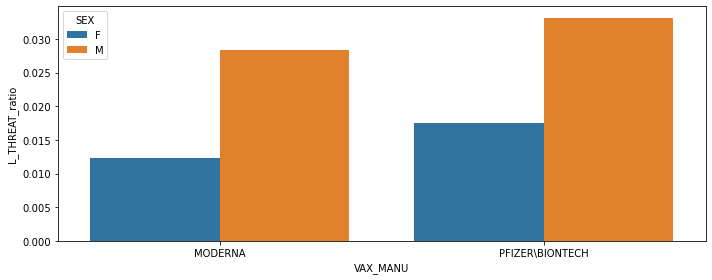

In [40]:
fig = plt.figure(figsize=(10,4))
sns.barplot(x='VAX_MANU',y='L_THREAT_ratio',hue='SEX',data=df_VAX_MANU_number1  )
plt.tight_layout()
plt.show()

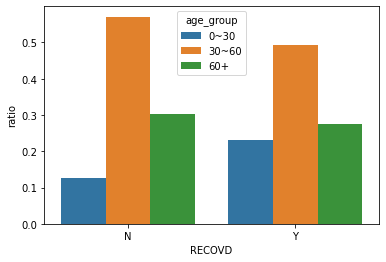

In [85]:
# Figure 2. ratio of RECOVD among different age groups [y=revord x=age groups （0-30 30-60 60+）]
df[['age_group']] = df['AGE_YRS'].apply(lambda x: x > 60 and '60+' or x >=30 and x <=60 and '30~60' or x <30 and '0~30')

df_R_sex = df[['RECOVD','age_group']].groupby(['RECOVD','age_group']).size().reset_index()
df_R_sex.columns.values[2] = 'values'

df_R_sex_ratio = df[['RECOVD']].groupby(['RECOVD']).size().reset_index()
df_R_sex_ratio.columns.values[1] = 'all_values'

df_R_sex_ratio = pd.merge(df_R_sex_ratio,df_R_sex,on='RECOVD')
df_R_sex_ratio['ratio'] = df_R_sex_ratio['values']/df_R_sex_ratio['all_values']

sns.barplot(x='RECOVD',y='ratio',hue='age_group',data=df_R_sex_ratio)
plt.show()

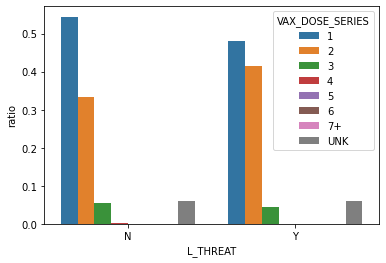

In [164]:
# Figure 3. ratio of L_THREAT among different VAX_DOSE_SERIES
df_R_sex = df[['L_THREAT','VAX_DOSE_SERIES']].groupby(['L_THREAT','VAX_DOSE_SERIES']).size().reset_index()
df_R_sex.columns.values[2] = 'values'

df_R_sex_ratio = df[['L_THREAT']].groupby(['L_THREAT']).size().reset_index()
df_R_sex_ratio.columns.values[1] = 'all_values'

df_R_sex_ratio = pd.merge(df_R_sex_ratio,df_R_sex,on='L_THREAT')
df_R_sex_ratio['ratio'] = df_R_sex_ratio['values']/df_R_sex_ratio['all_values']

sns.barplot(x='L_THREAT',y='ratio',hue='VAX_DOSE_SERIES',data=df_R_sex_ratio)
plt.show()

# L_THREAT

# VAX_DOSE_SERIES

# RECOVD

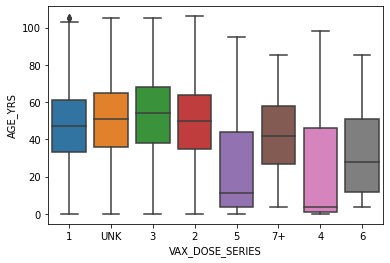

In [86]:
# Figure 4. BOXPLOT about VAX_DOSE_SERIES and AGE_YRS
sns.boxplot(x='VAX_DOSE_SERIES',y='AGE_YRS',data=df)
plt.show()

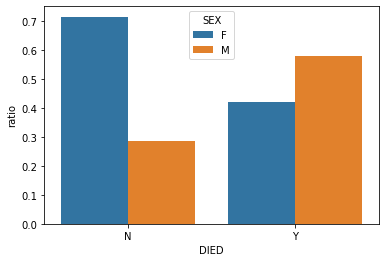

In [44]:
# Figure 5.DIED of different SEX

df_died_sex = df[['DIED','SEX']].groupby(['DIED','SEX']).size().reset_index()
df_died_sex.columns.values[2] = 'values'

df_died_sex_ratio = df[['DIED']].groupby(['DIED']).size().reset_index()
df_died_sex_ratio.columns.values[1] = 'all_values'

df_died_sex_ratio = pd.merge(df_died_sex_ratio,df_died_sex,on='DIED')
df_died_sex_ratio['ratio'] = df_died_sex_ratio['values']/df_died_sex_ratio['all_values']

sns.barplot(x='DIED',y='ratio',hue='SEX',data=df_died_sex_ratio)
plt.show()

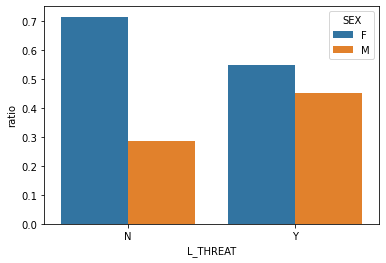

In [45]:
# Figure 6. L_THREAT of different SEX
df_L_sex = df[['L_THREAT','SEX']].groupby(['L_THREAT','SEX']).size().reset_index()
df_L_sex.columns.values[2] = 'values'

df_L_sex_ratio = df[['L_THREAT']].groupby(['L_THREAT']).size().reset_index()
df_L_sex_ratio.columns.values[1] = 'all_values'

df_L_sex_ratio = pd.merge(df_L_sex_ratio,df_L_sex,on='L_THREAT')
df_L_sex_ratio['ratio'] = df_L_sex_ratio['values']/df_L_sex_ratio['all_values']

sns.barplot(x='L_THREAT',y='ratio',hue='SEX',data=df_L_sex_ratio)
plt.show()

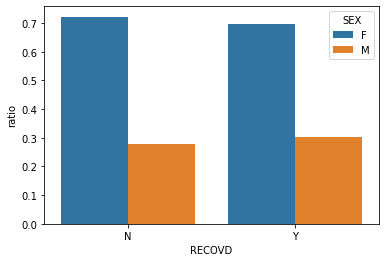

In [46]:
# Figure 7. RECOVD of different SEX
df_R_sex = df[['RECOVD','SEX']].groupby(['RECOVD','SEX']).size().reset_index()
df_R_sex.columns.values[2] = 'values'

df_R_sex_ratio = df[['RECOVD']].groupby(['RECOVD']).size().reset_index()
df_R_sex_ratio.columns.values[1] = 'all_values'

df_R_sex_ratio = pd.merge(df_R_sex_ratio,df_R_sex,on='RECOVD')
df_R_sex_ratio['ratio'] = df_R_sex_ratio['values']/df_R_sex_ratio['all_values']

sns.barplot(x='RECOVD',y='ratio',hue='SEX',data=df_R_sex_ratio)
plt.show()

In [87]:
# Figure 8. MODERNA and PFIZER\BIONTECH

list_VAX_MANU = ['MODERNA','PFIZER\BIONTECH']
df_VAX_MANU = df[df['VAX_MANU'].isin(list_VAX_MANU)]
df_VAX_MANU = df_VAX_MANU[['RECOVD','VAX_MANU','SEX','L_THREAT']].groupby(['RECOVD','VAX_MANU','SEX','L_THREAT']).size().reset_index()
df_VAX_MANU.columns.values[4] = 'values'

df_VAX_MANU_number = df_VAX_MANU.groupby(['RECOVD','VAX_MANU','SEX']).sum().reset_index()
df_VAX_MANU_number.columns.values[3] = 'all_values'

df_VAX_MANU_number1 = pd.merge(df_VAX_MANU,df_VAX_MANU_number)
df_VAX_MANU_number1['L_THREAT_ratio'] = df_VAX_MANU_number1['values']/df_VAX_MANU_number1['all_values']
df_VAX_MANU_number1 = df_VAX_MANU_number1[df_VAX_MANU_number1['L_THREAT'] == 'Y']
df_VAX_MANU_number1  

,RECOVD,VAX_MANU,SEX,L_THREAT,values,all_values,L_THREAT_ratio
1,N,MODERNA,F,Y,899,60649,0.014823
3,N,MODERNA,M,Y,760,19871,0.038247
5,N,PFIZER\BIONTECH,F,Y,1064,47147,0.022568
7,N,PFIZER\BIONTECH,M,Y,879,20004,0.043941
9,Y,MODERNA,F,Y,546,57359,0.009519
11,Y,MODERNA,M,Y,408,21229,0.019219
13,Y,PFIZER\BIONTECH,F,Y,576,46568,0.012369
15,Y,PFIZER\BIONTECH,M,Y,474,20777,0.022814


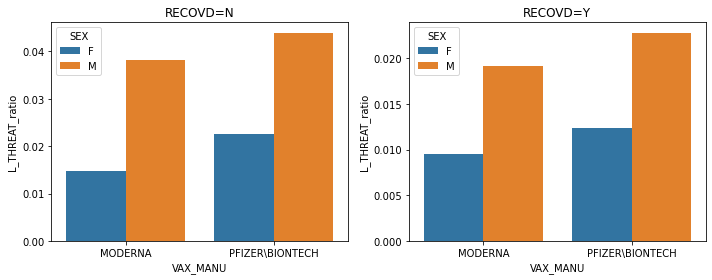

In [88]:
fig = plt.figure(figsize=(10,4))
n = 1
for i in ['N','Y']:
    df1 = df_VAX_MANU_number1[df_VAX_MANU_number1['RECOVD']==i]
    ax = fig.add_subplot(1,2,n)
    sns.barplot(x='VAX_MANU',y='L_THREAT_ratio',hue='SEX',data=df1,ax=ax)
    plt.title(f'RECOVD={i}')
    n+=1
plt.tight_layout()
plt.show()

In [89]:
# Figure 9. Heat map with features correlation
import numpy as np

for i in df.columns[1:]:
    print(f'number of label in feature {i}:{len(np.unique(df[i]))}')

number of label in feature STATE:61
number of label in feature AGE_YRS:138
number of label in feature SEX:2
number of label in feature DIED:2
number of label in feature L_THREAT:2
number of label in feature RECOVD:2
number of label in feature VAX_MANU:21
number of label in feature VAX_DOSE_SERIES:8
number of label in feature VAX_ROUTE:9
number of label in feature VAX_SITE:11
number of label in feature VAX_NAME:103
number of label in feature age_group:3


In [159]:
df_corr = df[['SEX','RECOVD','L_THREAT','VAX_MANU','VAX_DOSE_SERIES', 'DIED']]
df_corr = df_corr[df_corr['VAX_MANU'].isin(list_VAX_MANU)]

In [160]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_corr.columns:
    df_corr[i] = le.fit_transform(df_corr[i])
df_corr

,SEX,RECOVD,L_THREAT,VAX_MANU,VAX_DOSE_SERIES,DIED
0,0,1,0,0,0,0
1,0,1,0,0,0,0
4,0,0,0,0,0,0
7,0,1,0,0,0,0
8,1,1,0,0,7,0
...,...,...,...,...,...,...
1047522,0,0,1,0,1,1
1047528,1,1,0,1,2,0
1047531,0,0,1,1,7,0
1047533,0,0,0,0,2,0


In [143]:
df_corr_matrix = df_corr.corr()
df_corr_matrix

,SEX,RECOVD,L_THREAT,VAX_MANU,VAX_DOSE_SERIES,DIED
SEX,1.000000,0.019866,0.053143,0.049883,0.000047,0.083308
RECOVD,0.019866,1.000000,-0.038945,0.006769,-0.025017,-0.125096
L_THREAT,0.053143,-0.038945,1.000000,0.021227,0.003326,0.022630
VAX_MANU,0.049883,0.006769,0.021227,1.000000,0.014644,0.011372
VAX_DOSE_SERIES,0.000047,-0.025017,0.003326,0.014644,1.000000,-0.006271
DIED,0.083308,-0.125096,0.022630,0.011372,-0.006271,1.000000


In [144]:
df_corr_matrix.iloc[0,1]

0.019866417954602276

In [131]:
import math  

def getEntropy(s):
    if not isinstance(s,pd.core.series.Series):
        s=pd.Series(s) 
    prt_ary=s.groupby(by=s).count().values/float(len(s))
    return -(np.log2(prt_ary)*prt_ary).sum()

def getEntropyGain(s1,s2):
    return getEntropy(s2)-getCondEntropy(s1,s2) 

def getCondEntropy(s1,s2): 
    d=dict()
    for i in list(range(len(s1))):
        d[s1.iloc[i]]=d.get(s1.iloc[i],[])+[s2.iloc[i]]
    return sum( [ getEntropy(d[k]) * (len(d[k])/float(len(s1))) for k in d])
    
def getDiscreteCorr(s1,s2):
    return getEntropyGain(s1,s2)/math.sqrt(getEntropy(s1)*getEntropy(s2))

def getProbSS(s):
    if not isinstance(s, pd.core.series.Series):
        s = pd.Series(s)
    prt_ary = s.groupby(by=s).count().values / float(len(s)) 
    return sum(prt_ary**2)
    
def getGini(s1,s2):  
    d=dict()
    for i in list(range(len(s1))):
        d[s1.iloc[i]]=d.get(s1.iloc[i],[])+[s2.iloc[i]]
    return  1 - sum( [ getProbSS(d[k])*len(d[k])/float(len(s1))  for k in d])

In [153]:
col = ['SEX','RECOVD','L_THREAT','VAX_MANU','VAX_DOSE_SERIES', 'DIED']
for i in range(len(col)):
    for j in range(i+1, len(col)):
        gini = getGini(df.loc[:,col[i]], df.loc[:,col[j]])
        df_corr_matrix.iloc[i,j] = gini
        df_corr_matrix.iloc[j,i] = gini

KeyboardInterrupt: 

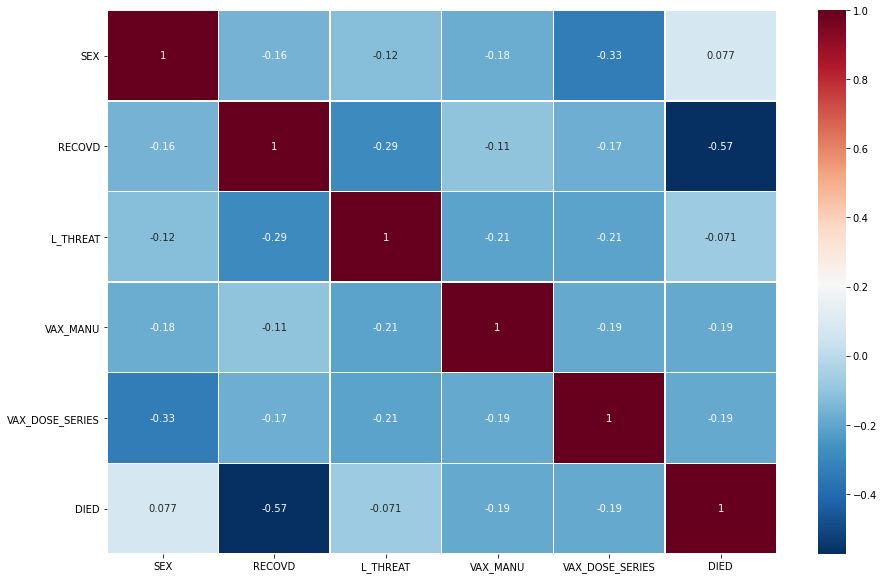

In [151]:
df_corr = df_corr.corr()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()
sns.heatmap(df_corr,annot=True,cmap='RdBu_r',ax=ax,linewidths=0.5, linecolor='white',)
plt.show()

# 4 Model

## 4.0 SMOTE process
In the 'DIED' variable, '0'represents the alive status and '1' represents the deadth status. Since '1' only takes small proportional part of the 'DIED'with nearly 2% only,there are imbalanced data issue. We use SMOTE process to tackle with this issue.

In [48]:
df_Dummy = df_Dummy.drop(['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5'],axis= 1)

In [49]:
df_Dummy['DIED_Y'].value_counts()

0    418092
1      7237
Name: DIED_Y, dtype: int64

In [50]:
df_Dummy_DIED = df_Dummy[['DIED_Y','AGE_YRS']].groupby('DIED_Y').count()
df_Dummy_DIED

,AGE_YRS
DIED_Y,
0,418092
1,7237


<AxesSubplot:xlabel='DIED_Y', ylabel='count'>

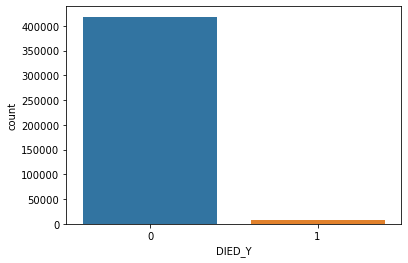

In [51]:
#sns.countplot(x='DIED_Y',data=df_Dummy_DIED)
df1=df_Dummy[['DIED_Y','AGE_YRS']].groupby('DIED_Y').count()
sns.countplot(x=df_Dummy['DIED_Y'])

In [52]:
import random
from sklearn.neighbors import NearestNeighbors 

class Smote:
    def __init__(self,samples,N,k):
        self.n_samples,self.n_attrs=samples.shape
        self.N=N
        self.k=k
        self.samples=samples
        self.newindex=0

    def over_sampling(self):
        N=int(self.N)
        self.synthetic = np.zeros((self.n_samples * N, self.n_attrs))
        neighbors=NearestNeighbors(n_neighbors=self.k).fit(self.samples)   
        for i in range(len(self.samples)):
            nnarray=neighbors.kneighbors(self.samples[i].reshape(1,-1),return_distance=False)[0]
            self._populate(N,i,nnarray)
        return self.synthetic
    
    def _populate(self,N,i,nnarray):
        for j in range(N):
            nn=random.randint(0,self.k-1)
            dif=self.samples[nnarray[nn]]-self.samples[i]
            gap=random.random()
            self.synthetic[self.newindex]=self.samples[i]+gap*dif
            self.newindex+=1

In [53]:
posDf = df_Dummy[df_Dummy['DIED_Y'] == 1].drop(['DIED_Y'], axis=1)
posArray = posDf.values 
newPosArray = Smote(posArray, 55, 5).over_sampling()
newPosDf = pd.DataFrame(newPosArray) 

newPosDf.columns = posDf.columns 

newPosDf.columns = posDf.columns  
cateCols = list(newPosDf.columns.drop(['AGE_YRS']))  
for i in cateCols:
    newPosDf[i] = newPosDf[i].apply(lambda x: 1 if x >= 0.5 else 0)
newPosDf['DIED_Y'] = 1  

In [54]:
df_final = pd.concat([df_Dummy, newPosDf])

In [55]:
df_final['DIED_Y'].value_counts()

0    418092
1    405272
Name: DIED_Y, dtype: int64

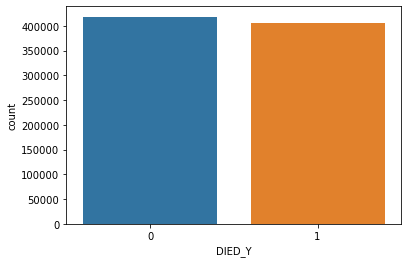

In [56]:
sns.countplot(x=df_final['DIED_Y'])
plt.show()

## 4.1 Logistic regresion
Logistic Regression is our baseline model.

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [58]:
#Training-test split
X = df_final.drop(['DIED_Y'],axis= 1)
y = df_final['DIED_Y']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=100)
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [59]:
logit=LogisticRegression()
lr2=logit.fit(X_train,y_train)

In [60]:
lr2.intercept_

array([-2.45286279])

In [61]:
print(lr2.coef_)

[[ 7.35917304e-02  8.87787348e-01 -1.80764838e-01  3.34965873e-02
   1.23398577e-02 -7.06104230e-01 -2.79625452e-01 -5.50550401e-01
  -8.17469393e-01 -9.99804100e-02 -2.18802734e-01 -7.16642896e-02
  -1.05998783e-03  1.93879678e-01  1.28639630e-02 -2.00549444e-01
   2.28270265e-01 -3.02961934e-01  1.54790045e-01 -1.35019002e+00
  -3.76197827e-02  1.86984415e+00  3.53276833e-01 -2.75760689e-02
  -5.21732861e-01 -1.56389789e-01 -2.76363502e-03 -1.47920879e-02
   4.56018104e-02  1.42803813e-01 -5.31466904e-03  1.50990534e-01
   5.44435913e-01 -4.16316019e-01 -7.29413954e-02  1.22398012e-01
   1.40414660e-01 -1.24722866e-01  8.51610320e-01 -5.23489289e-01
  -3.79767270e-02  4.86131927e-02 -7.29306011e-02 -4.40655284e-01
  -4.48504209e-01  5.49471475e-02 -1.08713310e-01 -5.21622875e-01
   1.06143209e+00  1.99912942e-01  4.33659480e-01 -4.25916575e-01
  -1.16718088e+00 -2.07436292e-02 -2.83767219e-01 -2.99890147e-01
   1.15430371e+00 -1.34503677e-01  2.17567197e-01  1.07284619e-02
  -1.38191

In [63]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
df_final

,AGE_YRS,DIED_Y,L_THREAT_Y,STATE_AL,STATE_AR,STATE_AS,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_FM,STATE_GA,STATE_GU,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MH,STATE_MI,STATE_MN,STATE_MO,STATE_MP,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_PR,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,STATE_XB,STATE_XL,STATE_XV,SEX_M,RECOVD_Y,VAX_MANU_MODERNA,VAX_MANU_PFIZER\BIONTECH,VAX_DOSE_SERIES_2,VAX_DOSE_SERIES_3,VAX_DOSE_SERIES_4,VAX_DOSE_SERIES_5,VAX_DOSE_SERIES_6,VAX_DOSE_SERIES_7+,VAX_ROUTE_IM,VAX_ROUTE_IN,VAX_ROUTE_JET,VAX_ROUTE_OT,VAX_ROUTE_PO,VAX_ROUTE_SC,VAX_ROUTE_SYR,VAX_SITE_GM,VAX_SITE_LA,VAX_SITE_LG,VAX_SITE_LL,VAX_SITE_MO,VAX_SITE_NS,VAX_SITE_OT,VAX_SITE_RA,VAX_SITE_RL,VAX_NAME_COVID19 (COVID19 (MODERNA)),VAX_NAME_COVID19 (COVID19 (PFIZER-BIONTECH))
0,33.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,73.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,47.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7,44.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
10,71.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398030,83.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
398031,83.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
398032,83.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
398033,83.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [67]:
lr2.score(X_train,y_train)

0.8806784972012673

In [68]:
#predict probabilities
p_hat = lr2.predict_proba(X_test)[:,1] 
p_hat[:5]

array([7.93548678e-01, 2.88455376e-02, 5.99030304e-04, 5.27320702e-01,
       6.78087562e-01])

In [69]:
#predict outcomes
y_hat = lr2.predict(X_test)
y_hat[:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [70]:
ct=pd.crosstab(y_test, y_hat)
ct

col_0,0,1
row_0,,
0,71754,11879
1,7821,73219


In [71]:
#True negatives
TN=ct.iloc[0,0] 
TN

71754

In [72]:
#True positives
TP=ct.iloc[1,1]
TP

73219

In [73]:
 # false negatives
FN = ct.values[1,0] 
FN

7821

In [74]:
#false positives
FP=ct.iloc[0,1]
FP

11879

In [75]:
from sklearn.metrics import confusion_matrix
ct2 = confusion_matrix(y_test, y_hat)
print(ct2)

[[71754 11879]
 [ 7821 73219]]


In [76]:
#accuracy

accuracy=(TN+TP)/(TN+TP+FN+FP)
accuracy

0.8803689736629563

In [77]:
#precision
precision=TP/(TP+FP)
precision

0.8604080001880186

In [78]:
#recall
recall=TP/(TP+FN)
recall

0.9034921026653504

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_hat)

0.8803689736629563

In [80]:
precision_score(y_test, y_hat)

0.8604080001880186

In [81]:
recall_score(y_test, y_hat)

0.9034921026653504

In [82]:
f1_score(y_test, y_hat)

0.8814238765363733

In [83]:
p_hat = lr2.predict_proba(X_test)[:,1] 

In [84]:
y_test

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [85]:
p_hat

array([7.93548678e-01, 2.88455376e-02, 5.99030304e-04, ...,
       6.82221864e-01, 3.51630492e-01, 1.09406323e-05])

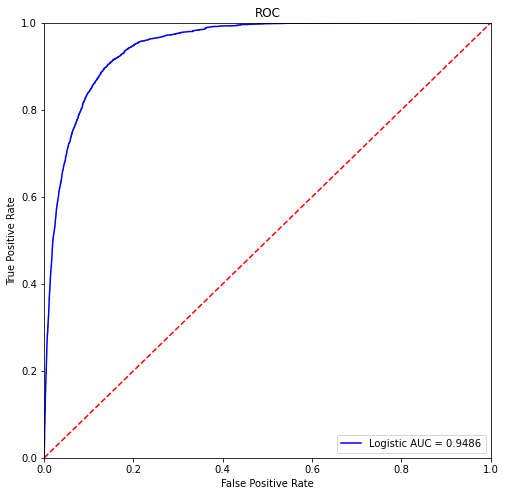

In [86]:
# roc plot
## calculte auc value
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, p_hat)
roc_auc1 = metrics.auc(fpr1, tpr1)

plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr1, tpr1, 'b', label = 'Logistic AUC = %0.4f' % roc_auc1)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0,1],[0,1],'r--')
plt.show()

# 5.Classification Tree

In [87]:
#load requires packages/modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [88]:
y = df_final.DIED_Y
X_train, X_test, y_train, y_test=train_test_split(df_final.drop(['DIED_Y'],axis= 1),y, test_size=0.2,random_state=100 )

In [89]:
dt =  DecisionTreeClassifier(criterion="entropy", random_state=42,max_depth=5, min_samples_leaf=5)  
dctm= dt.fit(X_train, y_train)
dctm.score(X_train, y_train)

0.8620202796151761

In [90]:
print(dctm.feature_importances_)
print(X_train.columns)

[3.43709768e-01 4.20414958e-03 4.78408982e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.86772537e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.69906427e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.74347250e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.80501029e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.74958055e-02 5.14351771e-01
 0.00000000e+00 0.000000

In [91]:
#feature importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(dctm.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
63,RECOVD_Y,0.514
0,AGE_YRS,0.344
72,VAX_ROUTE_IM,0.066
62,SEX_M,0.057
75,VAX_ROUTE_OT,0.007
...,...,...
28,STATE_MN,0.000
27,STATE_MI,0.000
26,STATE_MH,0.000
25,STATE_ME,0.000


In [92]:
df_final

,AGE_YRS,DIED_Y,L_THREAT_Y,STATE_AL,STATE_AR,STATE_AS,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_FM,STATE_GA,STATE_GU,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MH,STATE_MI,STATE_MN,STATE_MO,STATE_MP,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_PR,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,STATE_XB,STATE_XL,STATE_XV,SEX_M,RECOVD_Y,VAX_MANU_MODERNA,VAX_MANU_PFIZER\BIONTECH,VAX_DOSE_SERIES_2,VAX_DOSE_SERIES_3,VAX_DOSE_SERIES_4,VAX_DOSE_SERIES_5,VAX_DOSE_SERIES_6,VAX_DOSE_SERIES_7+,VAX_ROUTE_IM,VAX_ROUTE_IN,VAX_ROUTE_JET,VAX_ROUTE_OT,VAX_ROUTE_PO,VAX_ROUTE_SC,VAX_ROUTE_SYR,VAX_SITE_GM,VAX_SITE_LA,VAX_SITE_LG,VAX_SITE_LL,VAX_SITE_MO,VAX_SITE_NS,VAX_SITE_OT,VAX_SITE_RA,VAX_SITE_RL,VAX_NAME_COVID19 (COVID19 (MODERNA)),VAX_NAME_COVID19 (COVID19 (PFIZER-BIONTECH))
0,33.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,73.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,47.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7,44.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
10,71.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398030,83.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
398031,83.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
398032,83.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
398033,83.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


[Text(0.5963541666666666, 0.9166666666666666, 'RECOVD_Y <= 0.5\nentropy = 0.124\nsamples = 340263\nvalue = [334470, 5793]\nclass = N'),
 Text(0.3333333333333333, 0.75, 'VAX_ROUTE_IM <= 0.5\nentropy = 0.205\nsamples = 180484\nvalue = [174702, 5782]\nclass = N'),
 Text(0.16666666666666666, 0.5833333333333334, 'SEX_M <= 0.5\nentropy = 0.082\nsamples = 80995\nvalue = [80168, 827]\nclass = N'),
 Text(0.08333333333333333, 0.4166666666666667, 'L_THREAT_Y <= 0.5\nentropy = 0.05\nsamples = 61621\nvalue = [61276, 345]\nclass = N'),
 Text(0.041666666666666664, 0.25, 'VAX_SITE_LA <= 0.5\nentropy = 0.042\nsamples = 60099\nvalue = [59824, 275]\nclass = N'),
 Text(0.020833333333333332, 0.08333333333333333, 'entropy = 0.076\nsamples = 15681\nvalue = [15535, 146]\nclass = N'),
 Text(0.0625, 0.08333333333333333, 'entropy = 0.029\nsamples = 44418\nvalue = [44289, 129]\nclass = N'),
 Text(0.125, 0.25, 'VAX_SITE_LA <= 0.5\nentropy = 0.269\nsamples = 1522\nvalue = [1452, 70]\nclass = N'),
 Text(0.1041666666

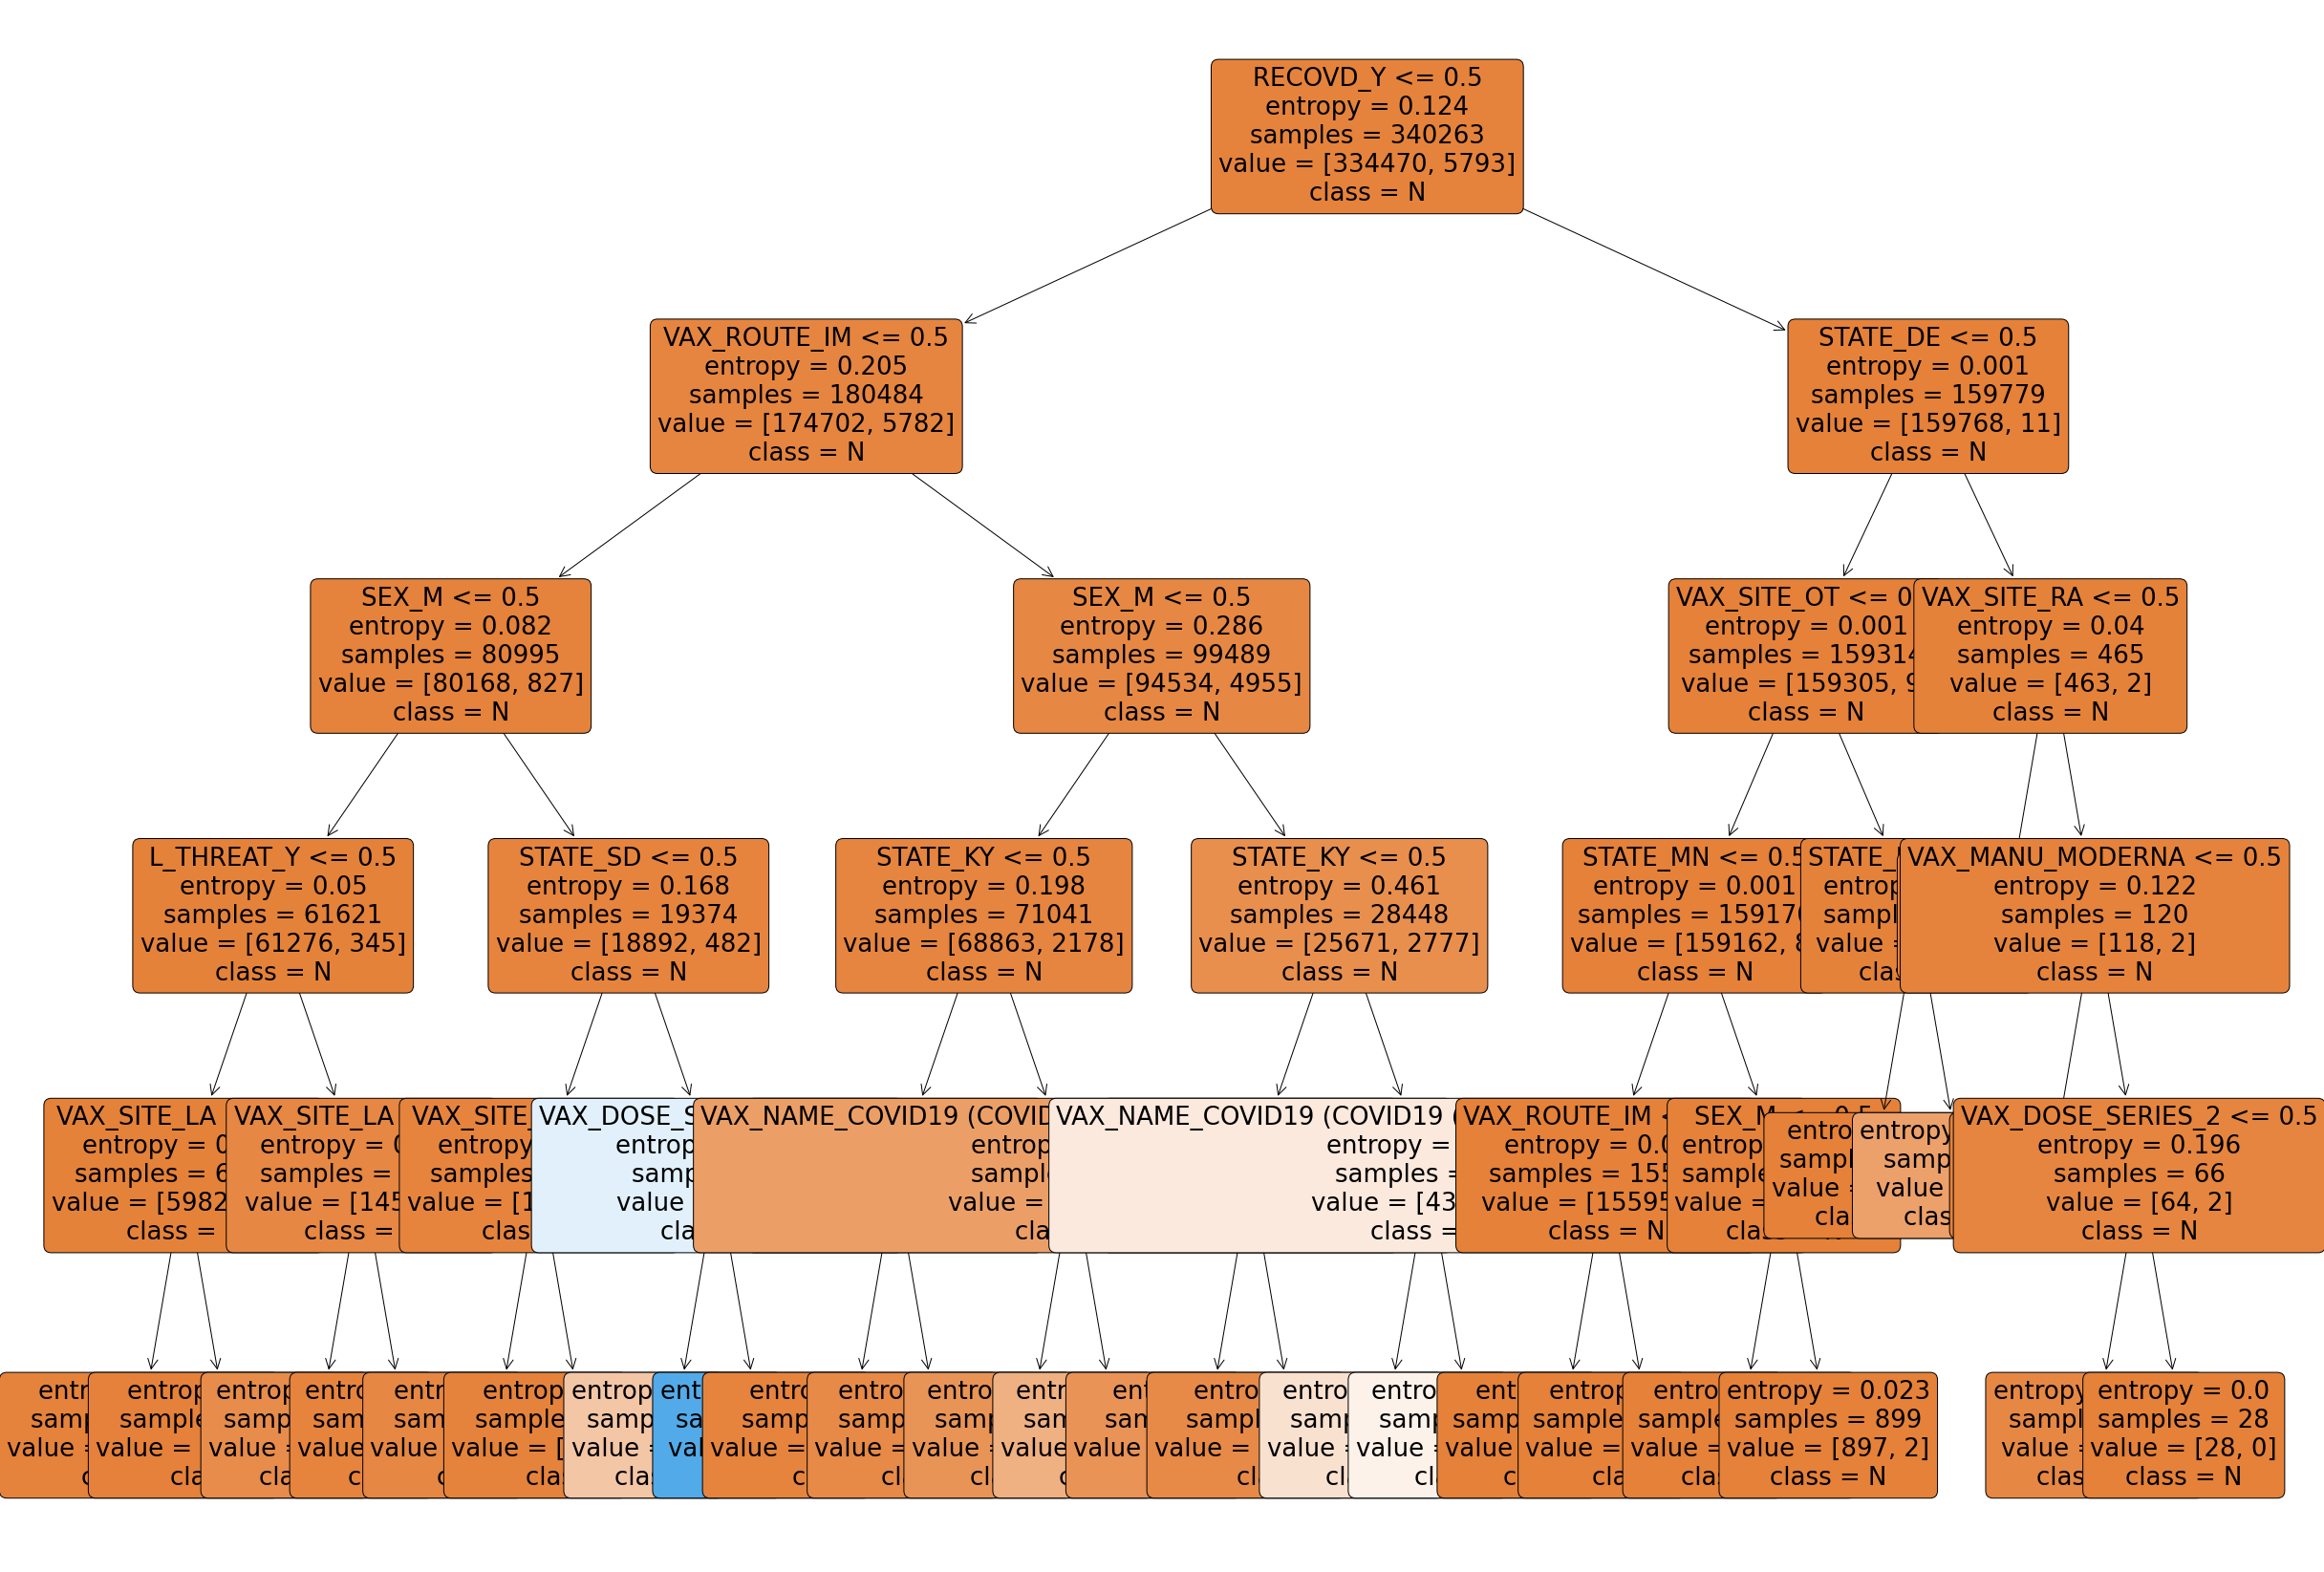

In [65]:
plt.figure (figsize=(40,30))
tree.plot_tree(dctm, fontsize=26, rounded=True, filled=True,feature_names = df3.columns, class_names=y_train.unique())

In [93]:
#prediction results
#we made predictions using the .predict()
y_hat = dctm.predict(X_test)
print(y_hat[:5])
print(y_test[:5])

[1 0 0 0 1]
48522     1
818830    0
79164     0
66700     1
289141    1
Name: DIED_Y, dtype: int64


In [94]:
print(confusion_matrix(y_test,y_hat))

[[72819 10814]
 [11841 69199]]


In [95]:
# Let's examine confusion matrix results 
# Evaluating our prediciton results 
a=accuracy_score(y_test, y_hat)
p=precision_score(y_test, y_hat, pos_label=1)
r=recall_score(y_test, y_hat, pos_label=1)
f1=f1_score(y_test, y_hat, pos_label=1)


print("accuracy : %f:" %(a))
print("precision : %f:" %(p))
print("recall : %f:" %(r))
print("f1 score : %f" %(f1))

accuracy : 0.862424:
precision : 0.864847:
recall : 0.853887:
f1 score : 0.859332


## Cross validation

In [96]:
#crossvalidation for model accuracy
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=33, shuffle=True)
# define model
dt3 =  DecisionTreeClassifier(criterion="entropy", random_state=42,max_depth=5, min_samples_leaf=5)  
# evaluate model
scores = cross_val_score(dt3, X_train, y_train, scoring='accuracy', cv=cv)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.862 (0.001)


In [97]:
# Trying a list of values to try for max_depth:
max_depth_range = list(range(1, 10))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    dct = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0, criterion="entropy",  min_samples_leaf=5)
    dct.fit(X_train, y_train)
    score = dct.score(X_test, y_test)
    accuracy.append(score)
accuracy

[0.7337814942340274,
 0.8312048726870829,
 0.8312170179689445,
 0.8513053141680785,
 0.8624243197123997,
 0.871217503780219,
 0.8776059220394358,
 0.8840854299126147,
 0.8898544387968884]

In [98]:
#Use grid seach for hyperparameter tuning
# Define multiple paramaters in GridSearchCV
from sklearn.model_selection import GridSearchCV

hyper_params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [5,10,15]
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=hyper_params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5}


[Text(0.5963541666666666, 0.9166666666666666, 'RECOVD_Y <= 0.5\nentropy = 0.124\nsamples = 340263\nvalue = [334470, 5793]\nclass = N'),
 Text(0.3333333333333333, 0.75, 'VAX_ROUTE_IM <= 0.5\nentropy = 0.205\nsamples = 180484\nvalue = [174702, 5782]\nclass = N'),
 Text(0.16666666666666666, 0.5833333333333334, 'SEX_M <= 0.5\nentropy = 0.082\nsamples = 80995\nvalue = [80168, 827]\nclass = N'),
 Text(0.08333333333333333, 0.4166666666666667, 'L_THREAT_Y <= 0.5\nentropy = 0.05\nsamples = 61621\nvalue = [61276, 345]\nclass = N'),
 Text(0.041666666666666664, 0.25, 'VAX_SITE_LA <= 0.5\nentropy = 0.042\nsamples = 60099\nvalue = [59824, 275]\nclass = N'),
 Text(0.020833333333333332, 0.08333333333333333, 'entropy = 0.076\nsamples = 15681\nvalue = [15535, 146]\nclass = N'),
 Text(0.0625, 0.08333333333333333, 'entropy = 0.029\nsamples = 44418\nvalue = [44289, 129]\nclass = N'),
 Text(0.125, 0.25, 'VAX_SITE_LA <= 0.5\nentropy = 0.269\nsamples = 1522\nvalue = [1452, 70]\nclass = N'),
 Text(0.1041666666

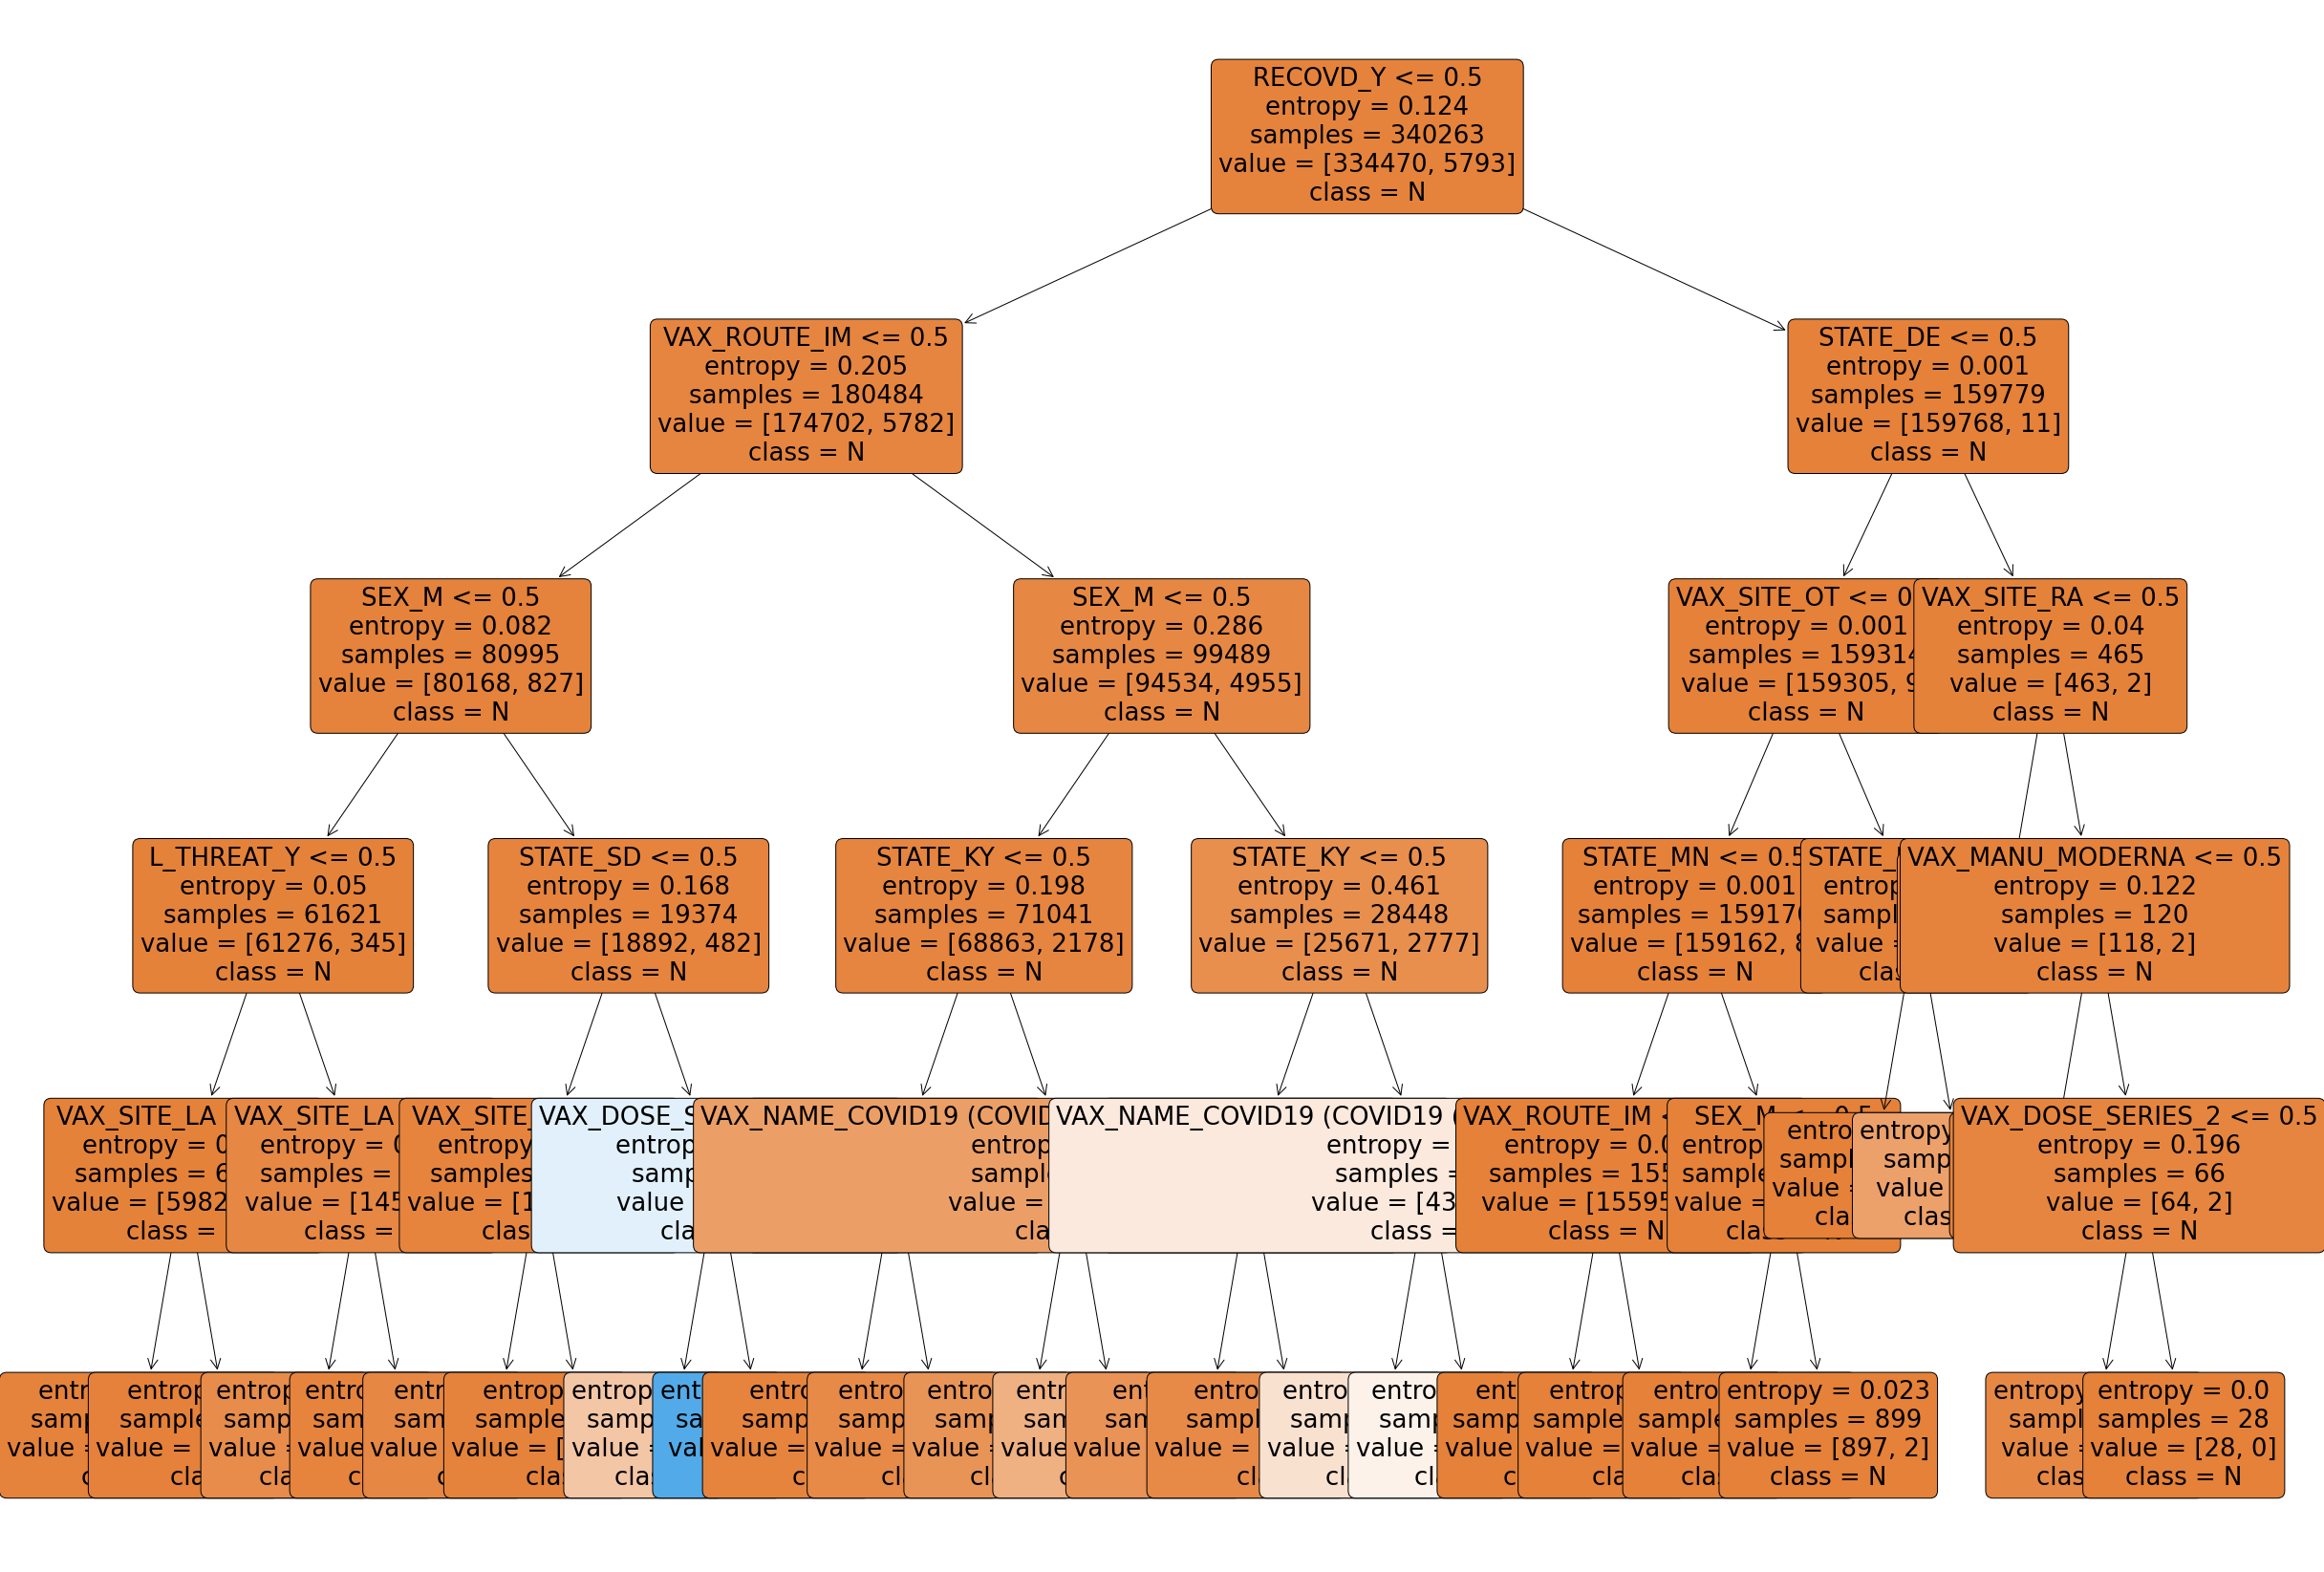

In [72]:
dt2 =  DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=4, min_samples_leaf=15)  
dctm2= dt.fit(X_train, y_train)
dctm2.score(X_train, y_train)
plt.figure (figsize=(40,30))
tree.plot_tree(dctm2, fontsize=26,max_depth=None, rounded=True, filled=True,feature_names = df3.columns, class_names=y_train.unique())

In [99]:
#prediction results
#we made predictions using the .predict()
y_test_label = [i == 1 and 1 or 0 for i in y_test]
p_hat2 = dctm.predict_proba(X_test)[:,1] 

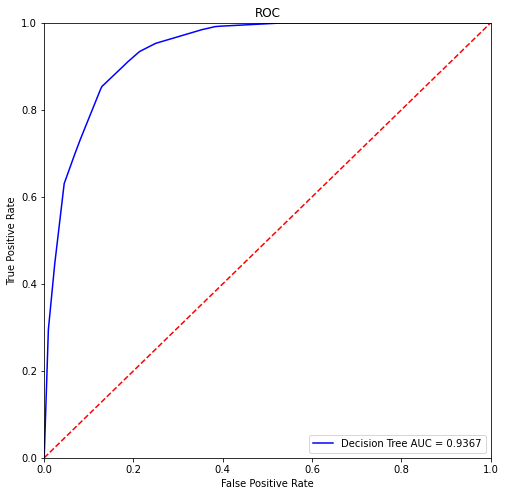

In [101]:
# roc plot
## calculte auc value
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test_label, p_hat2)
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr2, tpr2, 'b', label = 'Decision Tree AUC = %0.4f' % roc_auc2)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0,1],[0,1],'r--')
plt.show()

# Random forest

In [148]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [149]:
# split into test and train set
y = df_final.DIED_Y
X_train, X_test, y_train, y_test=train_test_split(df_final.drop(['DIED_Y'],axis= 1),y, test_size=0.2,random_state=100 )

In [150]:
X_train.shape,X_test.shape

((658691, 90), (164673, 90))

In [151]:
X_train

,AGE_YRS,L_THREAT_Y,STATE_AL,STATE_AR,STATE_AS,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_FM,STATE_GA,STATE_GU,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MH,STATE_MI,STATE_MN,STATE_MO,STATE_MP,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_PR,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,STATE_XB,STATE_XL,STATE_XV,SEX_M,RECOVD_Y,VAX_MANU_MODERNA,VAX_MANU_PFIZER\BIONTECH,VAX_DOSE_SERIES_2,VAX_DOSE_SERIES_3,VAX_DOSE_SERIES_4,VAX_DOSE_SERIES_5,VAX_DOSE_SERIES_6,VAX_DOSE_SERIES_7+,VAX_ROUTE_IM,VAX_ROUTE_IN,VAX_ROUTE_JET,VAX_ROUTE_OT,VAX_ROUTE_PO,VAX_ROUTE_SC,VAX_ROUTE_SYR,VAX_SITE_GM,VAX_SITE_LA,VAX_SITE_LG,VAX_SITE_LL,VAX_SITE_MO,VAX_SITE_NS,VAX_SITE_OT,VAX_SITE_RA,VAX_SITE_RL,VAX_NAME_COVID19 (COVID19 (MODERNA)),VAX_NAME_COVID19 (COVID19 (PFIZER-BIONTECH))
192145,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
169433,59.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
268945,63.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
122097,67.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
307768,88.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437896,75.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
133085,58.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
352758,87.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
432673,52.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


In [152]:
X_test

,AGE_YRS,L_THREAT_Y,STATE_AL,STATE_AR,STATE_AS,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_FM,STATE_GA,STATE_GU,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MH,STATE_MI,STATE_MN,STATE_MO,STATE_MP,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_PR,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,STATE_XB,STATE_XL,STATE_XV,SEX_M,RECOVD_Y,VAX_MANU_MODERNA,VAX_MANU_PFIZER\BIONTECH,VAX_DOSE_SERIES_2,VAX_DOSE_SERIES_3,VAX_DOSE_SERIES_4,VAX_DOSE_SERIES_5,VAX_DOSE_SERIES_6,VAX_DOSE_SERIES_7+,VAX_ROUTE_IM,VAX_ROUTE_IN,VAX_ROUTE_JET,VAX_ROUTE_OT,VAX_ROUTE_PO,VAX_ROUTE_SC,VAX_ROUTE_SYR,VAX_SITE_GM,VAX_SITE_LA,VAX_SITE_LG,VAX_SITE_LL,VAX_SITE_MO,VAX_SITE_NS,VAX_SITE_OT,VAX_SITE_RA,VAX_SITE_RL,VAX_NAME_COVID19 (COVID19 (MODERNA)),VAX_NAME_COVID19 (COVID19 (PFIZER-BIONTECH))
48522,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
818830,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
79164,49.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
66700,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
289141,65.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164010,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
350105,43.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
233287,62.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
44250,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## Random Forest Classifier

In [153]:
from sklearn.ensemble import RandomForestClassifier 

In [154]:
# examine our hyper parameters
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [155]:
classifierRF  = RandomForestClassifier(n_estimators=2,random_state=0) # instantiate the classifier 

In [156]:
# calculate cross validation score 
cv_results = cross_val_score(classifierRF,X_train,y_train,cv=5)

In [157]:
print(cv_results)
print(np.mean(cv_results),np.std(cv_results),np.quantile(cv_results,[0.025,0.975]))

[0.99168052 0.99167287 0.99151346 0.99157419 0.99128573]
0.9915453526233587 0.00014406961328568597 [0.99130851 0.99167975]


In [158]:
# fit the model
classifierRF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2, random_state=0)

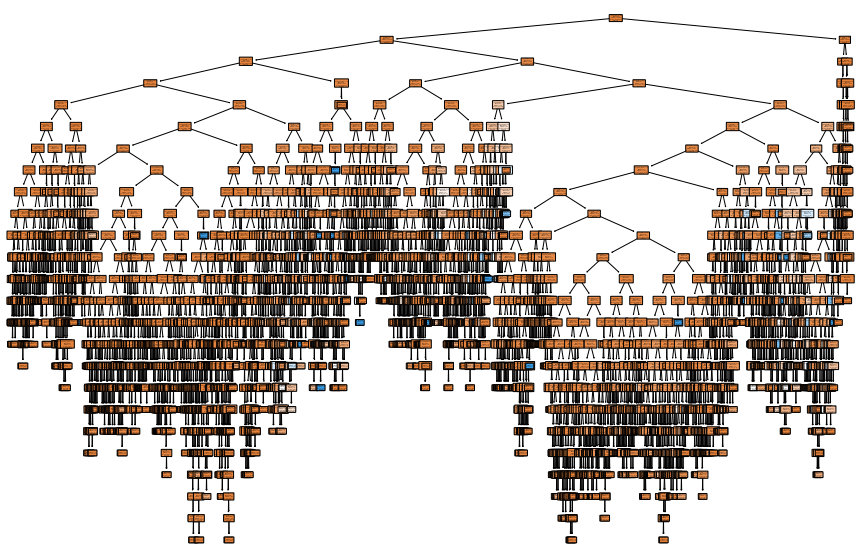

In [158]:
# let's examine two trees visually 

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(classifierRF.estimators_[0], 
          feature_names=X_train.columns,
          class_names=df2['DIED'].unique(), 
          filled=True, rounded=True)

plt.show()

In [159]:
# Predict test set results 
y_predict = classifierRF.predict(X_test)

In [160]:
# Print confusion matrix
confusion_matrix(y_predict, y_test)

array([[82421,    16],
       [ 1212, 81024]], dtype=int64)

In [161]:
# Print measurement metrices
print('Accuracy: %.3f' % accuracy_score(np.array(y_test), y_predict))
print('Precision: %.3f' % precision_score(np.array(y_test), y_predict, pos_label=1))
print('Recall: %.3f' % recall_score(np.array(y_test), y_predict, pos_label=1))

Accuracy: 0.993
Precision: 0.985
Recall: 1.000


In [162]:
# Print classification report that includes precision, recall, and f1 scores 
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     83633
           1       0.99      1.00      0.99     81040

    accuracy                           0.99    164673
   macro avg       0.99      0.99      0.99    164673
weighted avg       0.99      0.99      0.99    164673



## Hyperparameter Tuning

In [117]:
rf150 = RandomForestClassifier(n_estimators =500,random_state=1)

In [118]:
rf150.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [119]:
y_predict150 = rf150.predict(X_test)

In [120]:
print('Accuracy: %.3f' % accuracy_score(np.array(y_test), y_predict150))

Accuracy: 0.992


In [121]:
# Specify the hyperparameter range 

# number of trees 
n_estimator = [int(x) for x in np.linspace(start =200, stop=1000,num=10)]
# number of feature at each split
max_features = ['auto','sqrt']
# max depth 
max_depth = [int(x) for x in np.linspace(start =10, stop=100,num=10)]
# min number of sample at each split 
min_sam_split = [2,5,10]


# Create a random grid 
rnd_grid= {'n_estimators':n_estimator,
          'max_features':max_features,
          'max_depth' :max_depth,
          'min_samples_split' :min_sam_split}

print(rnd_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 5, 10]}


In [122]:
from sklearn.model_selection import RandomizedSearchCV

In [123]:
# use random search to select best hyperparameters 
# cv (Cross Validation) specifies number of times (3 fold in this case) that
# each hyper parameter combination will be evaluated)
rfn=RandomForestClassifier()
rfn_random = RandomizedSearchCV(estimator=rfn,param_distributions =rnd_grid,
                               n_iter = 10,cv=5,verbose=2,random_state=33,n_jobs=-1)
rfn_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=33, verbose=2)

In [124]:
# rfn_random model continues make prediction with performance of cv-5
# Predict test set results 
y_predict = rfn_random.predict(X_test)

# Print confusion matrix
confusion_matrix(y_predict, y_test)

# Print measurement metrices
print('Accuracy: %.3f' % accuracy_score(np.array(y_test), y_predict))
print('Precision: %.3f' % precision_score(np.array(y_test), y_predict, pos_label=1))
print('Recall: %.3f' % recall_score(np.array(y_test), y_predict, pos_label=1))

Accuracy: 0.992
Precision: 0.984
Recall: 1.000


In [125]:
# Examine the results from each combination of hyperparameters 
pd.DataFrame(rfn_random.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2108.712000,20.681673,56.238627,0.633987,733,2,sqrt,80,"{'n_estimators': 733, 'min_samples_split': 2, ...",0.991392,0.991453,0.991240,0.991362,0.991050,0.991299,0.000142,6
1,2121.550845,14.820779,56.707758,0.507334,733,2,auto,70,"{'n_estimators': 733, 'min_samples_split': 2, ...",0.991392,0.991407,0.991271,0.991392,0.991119,0.991316,0.000110,2
2,740.767912,3.247678,17.833113,0.306150,288,5,auto,30,"{'n_estimators': 288, 'min_samples_split': 5, ...",0.978974,0.979368,0.978844,0.979649,0.979292,0.979225,0.000287,8
3,2615.288734,18.546195,70.873590,1.596851,911,10,auto,80,"{'n_estimators': 911, 'min_samples_split': 10,...",0.991407,0.991476,0.991263,0.991339,0.991028,0.991302,0.000154,4
4,2344.923918,10.750627,63.978749,1.510454,822,2,sqrt,60,"{'n_estimators': 822, 'min_samples_split': 2, ...",0.991362,0.991422,0.991248,0.991346,0.991028,0.991281,0.000139,7
5,1335.677702,3.421153,36.228959,0.520866,466,2,sqrt,90,"{'n_estimators': 466, 'min_samples_split': 2, ...",0.991438,0.991422,0.991255,0.991369,0.991081,0.991313,0.000133,3
6,1011.597283,4.993416,25.580760,0.716139,822,10,auto,10,"{'n_estimators': 822, 'min_samples_split': 10,...",0.894245,0.894313,0.891186,0.893584,0.894381,0.893542,0.001212,10
7,353.955517,1.735310,9.080792,0.180601,288,10,auto,10,"{'n_estimators': 288, 'min_samples_split': 10,...",0.894519,0.894062,0.892909,0.894078,0.894617,0.894037,0.000607,9
8,1829.816700,10.921802,39.196629,6.465117,644,5,sqrt,90,"{'n_estimators': 644, 'min_samples_split': 5, ...",0.991422,0.991430,0.991263,0.991346,0.991050,0.991302,0.000140,5
9,1108.815493,277.043279,28.223008,10.003804,466,5,sqrt,100,"{'n_estimators': 466, 'min_samples_split': 5, ...",0.991422,0.991422,0.991331,0.991377,0.991066,0.991324,0.000133,1


In [126]:
print('Best hyper parameter:', rfn_random.best_params_)

Best hyper parameter: {'n_estimators': 466, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 100}


In [127]:
# compare model accuracy between our base model and random search results 

base_model = RandomForestClassifier(n_estimators =2, random_state=12)
base_model.fit(X_train,y_train)
y_pred_base = base_model.predict(X_test) 
base_accuracy =accuracy_score(np.array(y_test), y_pred_base)
print('Base model accuracy: ',base_accuracy)

best_random = rfn_random.best_estimator_
best_random.fit(X_train,y_train)
y_pred_rnd = best_random.predict(X_test)
rnd_accuracy = accuracy_score(np.array(y_test), y_pred_rnd)

print('Random best hyperparameter accuracy: ',rnd_accuracy)

Base model accuracy:  0.9923241818634506
Random best hyperparameter accuracy:  0.9921420026355262


In [129]:
# View fature scores 
feature_score = pd.Series(best_random.feature_importances_,index=X_train.columns).sort_values(ascending =False)

In [130]:
feature_score

AGE_YRS          3.896477e-01
RECOVD_Y         2.265229e-01
SEX_M            5.405048e-02
VAX_ROUTE_IM     3.837518e-02
VAX_ROUTE_SYR    2.505274e-02
                     ...     
VAX_ROUTE_IN     1.103896e-06
VAX_SITE_GM      8.789888e-07
STATE_FM         4.462693e-07
STATE_XL         7.622875e-08
STATE_XV         6.923945e-08
Length: 90, dtype: float64

Text(0, 0.5, 'Feature name')

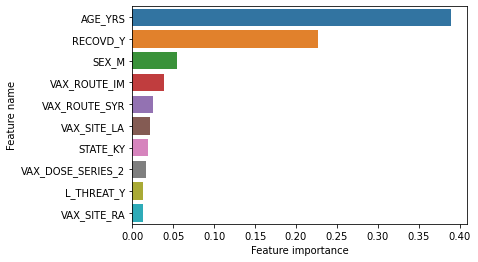

In [146]:
# Visualize feature importance 
sns.barplot(x=feature_score[:10],y=feature_score[:10].index)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")

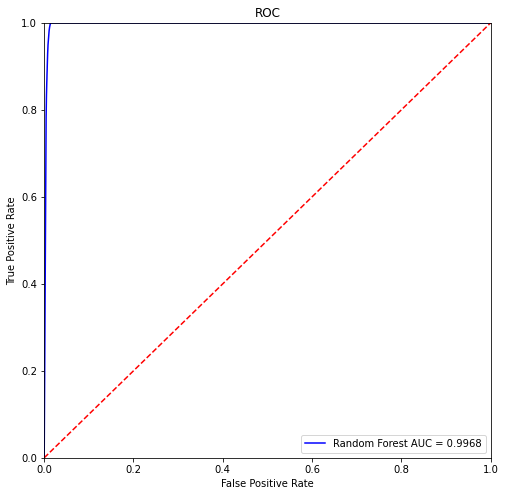

In [165]:
#prediction results
#we made predictions using the .predict()
y_test_label = [i == 'Y' and 1 or 0 for i in y_test]
p_hat3 = rf150.predict_proba(X_test)[:,1] 

# roc plot
## calculte auc value
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test_label, p_hat3)
roc_auc3 = metrics.auc(fpr3, tpr3)


plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr3, tpr3, 'b', label = 'Random Forest AUC = %0.4f' % roc_auc3)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0,1],[0,1],'r--')
plt.show()

## ROC graph

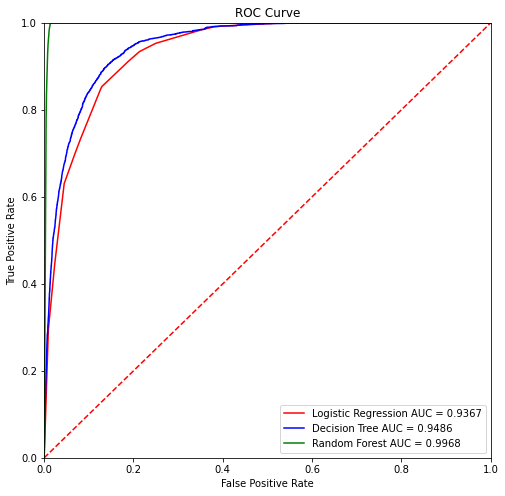

In [166]:
# roc plot
## calculte auc value
plt.figure(figsize=(8, 8))
plt.plot(fpr1, tpr1, 'b', color = 'red', label = 'Logistic Regression AUC = %0.4f' % roc_auc1)
plt.plot(fpr2, tpr2, 'b', color = 'blue', label = 'Decision Tree AUC = %0.4f' % roc_auc2)
plt.plot(fpr3, tpr3, 'b', color = 'green', label = 'Random Forest AUC = %0.4f' % roc_auc3)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0,1],[0,1],'r--')
plt.show()

In [134]:
plt.savefig("ROC.jpg")

<Figure size 432x288 with 0 Axes>